In [203]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [3]:
df = pd.read_excel("../../datasets/online_retail_II-230817-120704.xlsx")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.shape

(525461, 8)

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [9]:
df.loc[df["Quantity"] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [12]:
df.loc[df["Price"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
df[df["Invoice"] == "C489449"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [17]:
filtered_df = df[df['Invoice'].apply(lambda x: len(str(x)) > 6)]

In [23]:
df['TYPE_INVOICE'] = filtered_df['Invoice'].str[0]

In [24]:
df["TYPE_INVOICE"].unique()

array([nan, 'C', 'A'], dtype=object)

In [116]:
def check_df(dataframe, head=5):
    
    print("#################### SHAPE ##################")
    print(f"{dataframe.shape}")
    print("#################### TYPES ##################")
    print(f"{dataframe.dtypes}")
    print("#################### HEAD ##################")
    print(f"{dataframe.head(head)}")
    print("#################### TAIL ##################")
    print(f"{dataframe.tail(head)}")
    print("#################### NA ##################")
    print(f"{dataframe.isnull().sum()}")
    print("#################### QUANTILES ##################")
    print(f"{dataframe.quantile([0,0.05,0.50,0.95,0.99,1]).T}")

def grab_col_names(data_frame, cat_th=25 , car_th=30): 
    cat_cols = [col for col in data_frame.columns if data_frame[col].dtype == "O"]
    num_but_cat = [col for col in data_frame.columns if data_frame[col].nunique() < car_th and data_frame[col].dtype != "O"]
    cat_but_car = [col for col in data_frame.columns if data_frame[col].nunique() > car_th and data_frame[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in data_frame.columns if data_frame[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {data_frame.shape[0]}")
    print(f"Variables: {data_frame.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_car: {len(num_but_cat)}")
    return num_cols,cat_cols,cat_but_car

def missing_values_table(data_frame, na_name=False):
    na_columns = [col for col in data_frame.columns if data_frame[col].isnull().sum() > 0]

    n_miss = data_frame[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (data_frame[na_columns].isnull().sum() / data_frame.shape[0] * 100)
    missing_df = pd.concat([n_miss, np.round(ratio,2)],axis=1, keys=["n_miss" , "ratio"])
    print(missing_df,end="\n")

    if na_name:
        return na_columns
        
def locate_uneven_cols(dataframe, col):
    total_values = dataframe[col].value_counts().sum()
    val_counts = dataframe[col].value_counts() 
    for count in val_counts:
        percentage = (count / total_values) * 100
        if percentage > 99:
            return True
    return False

In [37]:
check_df(df)

#################### SHAPE ##################
(525461, 9)
#################### TYPES ##################
Invoice                 object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
Price                  float64
Customer ID            float64
Country                 object
TYPE_INVOICE            object
dtype: object
#################### HEAD ##################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country TYPE_INVOICE  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom       

TypeError: '<' not supported between instances of 'str' and 'int'

In [39]:
df[df["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,NaN
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,NaN
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,NaN
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,NaN
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom,NaN
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom,NaN
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom,NaN
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom,NaN


In [45]:
df[df["Description"].isnull()]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,NaN
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,NaN
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom,NaN
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom,NaN
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom,NaN
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom,NaN
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom,NaN
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom,NaN


In [54]:
df.loc[(df["Description"].isnull()) & (df["Country"] != "United Kingdom")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE


In [42]:
num_cols,cat_cols,cat_but_car = grab_col_names(df)

Observations: 525461
Variables: 9
cat_cols: 1
cat_but_car: 4
num_cols: 4
num_but_car: 0


In [55]:
missing_values_table(df)

              n_miss  ratio
TYPE_INVOICE  515252  98.06
Customer ID   107927  20.54
Description     2928   0.56


In [58]:
df.loc[(df["Description"].notnull()) & (df["Customer ID"].isnull())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,NaN
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,NaN
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,NaN
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,NaN
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,NaN,United Kingdom,NaN
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21,NaN,United Kingdom,NaN
525147,538154,DOT,DOTCOM POSTAGE,1,2010-12-09 16:35:00,85.79,NaN,United Kingdom,NaN
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom,NaN


In [59]:
df.loc[(df["Description"].isnull()) & (df["Customer ID"].notnull())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE


In [64]:
df[df["Invoice"] == "C489449"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TYPE_INVOICE
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,C
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,C
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,C
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,C
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,C
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia,C
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C


In [70]:
dff = df.drop(["TYPE_INVOICE"], axis=1)

In [74]:
dff = dff.dropna()

In [75]:
missing_values_table(dff)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [76]:
dff["CANCELLED"] = df["TYPE_INVOICE"] == "C"

C:\Users\emmry\AppData\Local\Temp\ipykernel_8652\3294375697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["CANCELLED"] = df["TYPE_INVOICE"] == "C"


In [77]:
dff.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CANCELLED
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False


In [102]:
to_delete = df.loc[df["TYPE_INVOICE"] == "A"].index

In [117]:
for col in dff.columns:
    a = locate_uneven_cols(dff,col)
    print(a)

False
False
False
False
False
False
False
False
False


In [97]:
dff["CANCELLED"].value_counts()

CANCELLED
False    407695
True       9839
Name: count, dtype: int64

In [131]:
val_counts = dff["CANCELLED"].value_counts()
total = dff["CANCELLED"].value_counts().sum()

for count in val_counts:
    print((count / total) *100) 

97.64354519631934
2.3564548036806583


In [132]:
dff["Customer ID"].nunique()

4383

In [133]:
dff['TotalPrice'] = dff['Quantity'] * dff['Price']
monetary = dff.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary.columns = ['Customer ID', 'Monetary']

C:\Users\emmry\AppData\Local\Temp\ipykernel_8652\3583847753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['TotalPrice'] = dff['Quantity'] * dff['Price']


In [139]:
dff.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CANCELLED,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False,30.0


In [137]:
frequency = dff.drop_duplicates(subset=['Invoice', 'Customer ID']).groupby('Customer ID')['Invoice'].count().reset_index()
frequency.columns = ['Customer ID', 'Frequency']

In [138]:
frequency

,Customer ID,Frequency
0,12346.0,15
1,12347.0,2
2,12348.0,1
3,12349.0,4
4,12351.0,1
...,...,...
4378,18283.0,6
4379,18284.0,2
4380,18285.0,1
4381,18286.0,3


In [140]:
# Convert InvoiceDate to datetime if it's not already
dff['InvoiceDate'] = pd.to_datetime(dff['InvoiceDate'])

# Find the last date in the dataset
last_date = dff['InvoiceDate'].max()

# Calculate Recency
recency = dff.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (last_date - recency['InvoiceDate']).dt.days
recency = recency[['Customer ID', 'Recency']]


C:\Users\emmry\AppData\Local\Temp\ipykernel_8652\203950978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['InvoiceDate'] = pd.to_datetime(dff['InvoiceDate'])


In [142]:
recency

,Customer ID,Recency
0,12346.0,66
1,12347.0,2
2,12348.0,73
3,12349.0,42
4,12351.0,10
...,...,...
4378,18283.0,17
4379,18284.0,64
4380,18285.0,295
4381,18286.0,111


In [143]:
rfm = recency.merge(frequency, on='Customer ID').merge(monetary, on='Customer ID')

In [144]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,66,15,-64.68
1,12347.0,2,2,1323.32
2,12348.0,73,1,222.16
3,12349.0,42,4,2646.99
4,12351.0,10,1,300.93
...,...,...,...,...
4378,18283.0,17,6,641.77
4379,18284.0,64,2,436.68
4380,18285.0,295,1,427.00
4381,18286.0,111,3,1188.43


In [153]:
# Assign quartile values
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, labels=['4','3','2','1'])
# Adjusting the F_quartile calculation with duplicates='drop'
rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 5, labels=['1','2','3','4'], duplicates='drop')
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 4, labels=['1','2','3','4'])


# Combine the RFM quartile scores to a single score (RFM Score)
rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Analyze different segments (for example, '444' is a top customer segment)
print(rfm.head())

   Customer ID  Recency  Frequency  Monetary R_quartile F_quartile M_quartile  \
0      12346.0       66         15    -64.68          2          4          1   
1      12347.0        2          2   1323.32          4          1          3   
2      12348.0       73          1    222.16          2          1          1   
3      12349.0       42          4   2646.99          3          2          4   
4      12351.0       10          1    300.93          4          1          2   

  RFM_Score  
0       241  
1       413  
2       211  
3       324  
4       412  


In [154]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
0,12346.0,66,15,-64.68,2,4,1,241
1,12347.0,2,2,1323.32,4,1,3,413
2,12348.0,73,1,222.16,2,1,1,211
3,12349.0,42,4,2646.99,3,2,4,324
4,12351.0,10,1,300.93,4,1,2,412


In [156]:
dff = rfm.drop(["Customer ID"],axis=1)

In [192]:
def check_outliers(data_frame, col_name):
    up_limit, low_limit = outliers_treshold(data_frame, col_name)
    # Create a boolean series based on the condition
    outlier_condition = (data_frame[col_name] > up_limit) | (data_frame[col_name] < low_limit)
    
    # Use `.any()` on the boolean series directly
    if outlier_condition.any():
        return True
    else:
        return False


def outliers_treshold(data_frame, col_name, q1=0.05 ,q3=0.95):
    quartile1 = data_frame[col_name].quantile(q1)
    quartile3 = data_frame[col_name].quantile(q3)
    interquartile_range = quartile3-quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return up_limit, low_limit

def grab_outliers(data_frame,col_name,index=False):
    up,low = outliers_treshold(data_frame,col_name)
    if data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].shape[0] > 10:
        print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].head())
    else:
        print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))])
    if index:
        outlier_index = data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].index
        return outlier_index

In [161]:
num_cols, cat_cols, cat_but_car = grab_col_names(dff)

Observations: 4383
Variables: 7
cat_cols: 3
cat_but_car: 1
num_cols: 3
num_but_car: 3


In [164]:
dff.dtypes

Recency          int64
Frequency        int64
Monetary       float64
R_quartile    category
F_quartile    category
M_quartile    category
RFM_Score       object
dtype: object

In [165]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4383.0,90.395163,98.176493,0.00,16.00,51.00,137.00,373.00
Frequency,4383.0,5.381474,10.051921,1.00,1.00,3.00,6.00,270.00
Monetary,4383.0,1904.679118,8519.369281,-25111.09,285.26,655.94,1645.69,341776.73


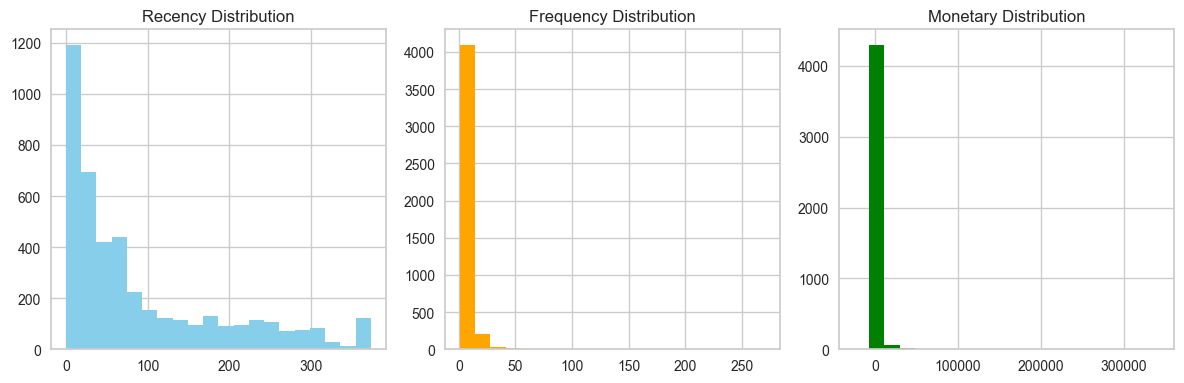

In [176]:
import matplotlib.pyplot as plt

# Plot histograms for each RFM metric
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=20, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=20, color='orange')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=20, color='green')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


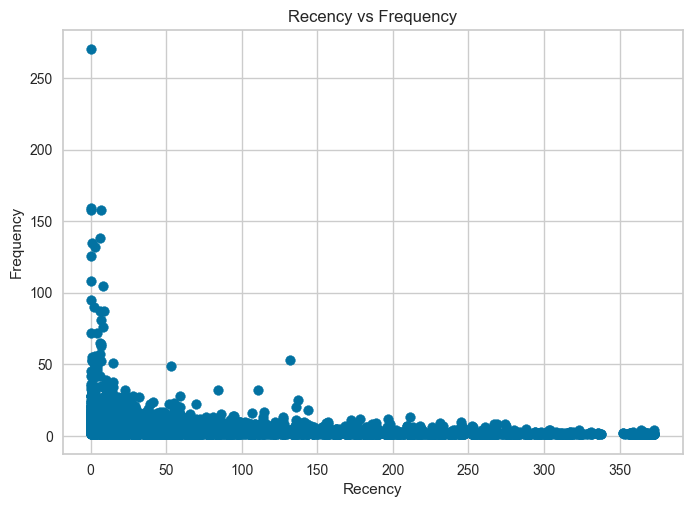

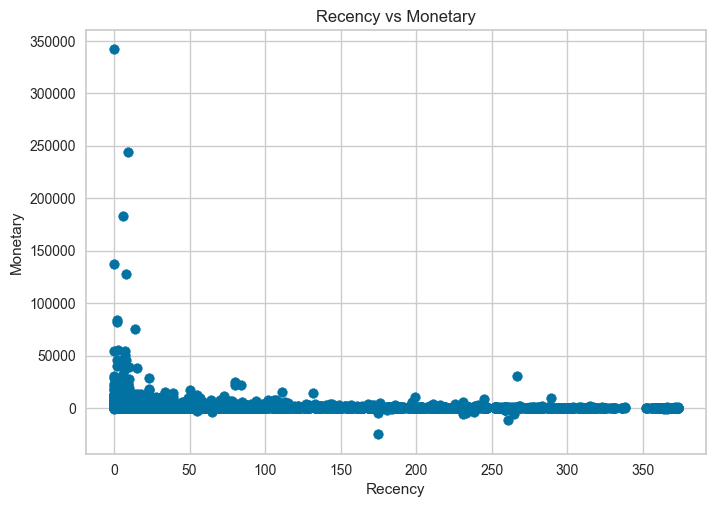

In [171]:
# Plot Recency vs Frequency
plt.scatter(rfm['Recency'], rfm['Frequency'])
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Plot Recency vs Monetary
plt.scatter(rfm['Recency'], rfm['Monetary'])
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


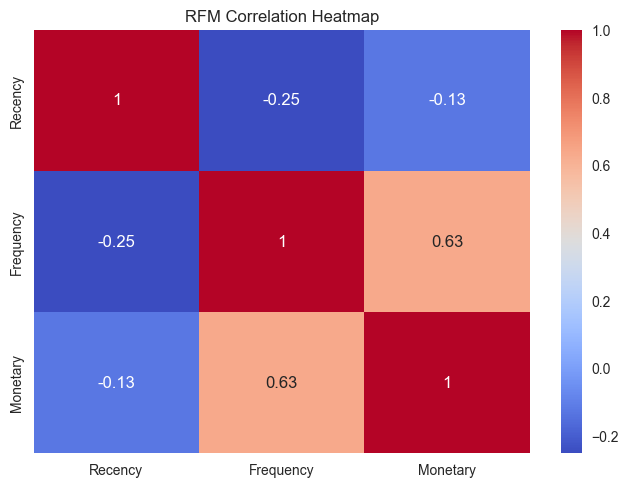

In [172]:
import seaborn as sns

# Calculate correlations
corr = rfm[['Recency', 'Frequency', 'Monetary']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()


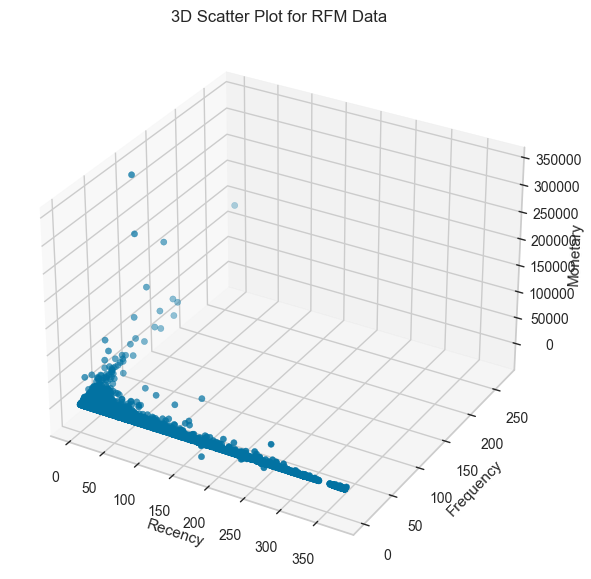

In [173]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D scatter for RFM
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot for RFM Data')

plt.show()


In [178]:
for col in num_cols:
    dff[col] = pd.to_numeric(dff[col], errors='coerce')
    

In [193]:
for col in num_cols:
    if check_outliers(dff,col):
        index = grab_outliers(dff,col,True)
        print("#############################")
        print(len(index))

     Recency  Frequency  Monetary R_quartile F_quartile M_quartile RFM_Score
88         7         81  19207.69          4          4          4       444
254        0        159  20898.03          4          4          4       444
314       53         49   6018.67          2          4          4       244
380        1         55  18249.71          4          4          4       444
387       15         51  37836.86          4          4          4       444
#############################
43
     Recency  Frequency  Monetary R_quartile F_quartile M_quartile RFM_Score
51        10          7  19543.84          4          3          4       434
88         7         81  19207.69          4          4          4       444
96        84         32  21893.53          2          4          4       244
210       10         10  16262.87          4          4          4       444
211        2         30  16874.17          4          4          4       444
#############################
66


In [196]:
rs = RobustScaler()
dff_scaled = rs.fit_transform(dff[['Recency', 'Frequency', 'Monetary']])

In [199]:
df2[num_cols] = rs.fit_transform(df2[num_cols])

In [201]:
df2.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
0,0.123967,2.4,-0.529700,2,4,1,241
1,-0.404959,-0.2,0.490565,4,1,3,413
2,0.181818,-0.4,-0.318855,2,1,1,211
3,-0.074380,0.2,1.463545,3,2,4,324
4,-0.338843,-0.4,-0.260954,4,1,2,412


In [210]:
le = LabelEncoder()

In [214]:
for col in cat_cols:
    df2[col] = le.fit_transform(df2[col])

In [215]:
df2.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
0,0.123967,2.4,-0.529700,1,3,0,28
1,-0.404959,-0.2,0.490565,3,0,2,49
2,0.181818,-0.4,-0.318855,1,0,0,16
3,-0.074380,0.2,1.463545,2,1,3,39
4,-0.338843,-0.4,-0.260954,3,0,1,48


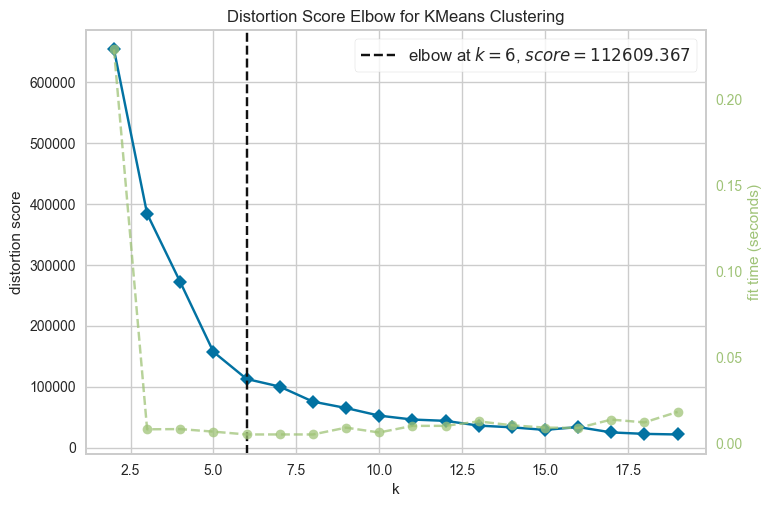

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [218]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df2)
elbow.show()

In [219]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df2)

In [221]:
labels = kmeans.labels_

In [224]:
dff["CLUSTERS"] = labels + 1

In [225]:
dff.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,CLUSTERS
0,66,15,-64.68,2,4,1,241,6
1,2,2,1323.32,4,1,3,413,4
2,73,1,222.16,2,1,1,211,1
3,42,4,2646.99,3,2,4,324,6
4,10,1,300.93,4,1,2,412,4


In [228]:
numeric = dff[num_cols]

In [230]:
numeric["CLUSTERS"] = labels + 1

C:\Users\emmry\AppData\Local\Temp\ipykernel_8652\2687179716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric["CLUSTERS"] = labels + 1


In [232]:
numeric.groupby("CLUSTERS").agg(["count","mean","median"])

Recency                    Frequency                    Monetary  \
           count        mean median     count        mean median    count   
CLUSTERS                                                                    
1            945   86.307937   78.0       945    2.788360    2.0      945   
2            714    6.736695    7.0       714   14.626050   10.0      714   
3           1054  244.235294  234.0      1054    1.757116    1.0     1054   
4            761   19.487516   17.0       761    5.935611    5.0      761   
5              5    4.600000    6.0         5  139.000000  105.0        5   
6            904   41.542035   36.0       904    3.810841    3.0      904   

                                    
                   mean     median  
CLUSTERS                            
1            810.333905     556.52  
2           5146.040541    2510.01  
3            335.059074     263.63  
4           1870.792118    1051.71  
5         206931.732000  183180.55  
6           1213.148631     610.23

In [238]:
dff[dff["CLUSTERS"] == 5]

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,CLUSTERS
957,8,105,128172.42,4,4,4,444,5
1291,6,138,183180.55,4,4,4,444,5
1662,9,87,243853.05,4,4,4,444,5
1869,0,270,137675.91,4,4,4,444,5
4254,0,95,341776.73,4,4,4,444,5


In [241]:
dff[dff["CLUSTERS"] == 3]

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score,CLUSTERS
7,202,1,488.21,1,1,2,112,3
14,373,1,130.00,1,1,1,111,3
15,268,1,500.24,1,1,2,112,3
16,263,1,917.70,1,1,3,113,3
18,259,3,774.62,1,2,3,123,3
...,...,...,...,...,...,...,...,...
4370,225,1,153.00,1,1,1,111,3
4371,213,2,741.85,1,1,3,113,3
4375,154,1,231.34,1,1,1,111,3
4377,212,1,120.32,1,1,1,111,3
